In [77]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [78]:
iris = load_iris()
iris_features = iris.feature_names

In [79]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [80]:
iris_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [81]:
df_data = pd.DataFrame(iris.data, columns = iris_features)
df_labels = pd.DataFrame(iris.target, columns = ['label'])

In [82]:
df_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [83]:
df_labels

,label
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [84]:
data = pd.concat([df_data, df_labels], axis=1)

In [85]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [86]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

Text(0.5, 1.0, 'Label')

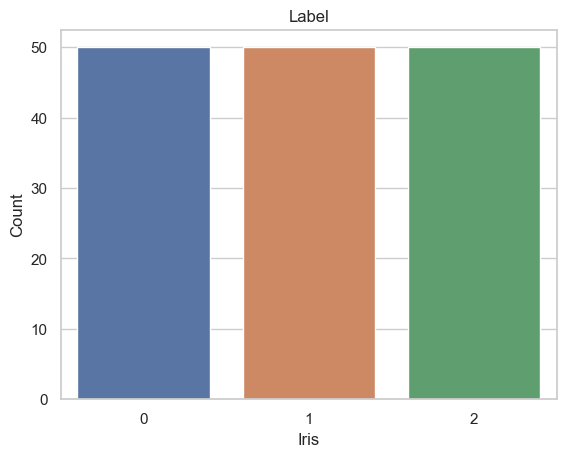

In [87]:
sns.countplot(data = data, x="label")
plt.xlabel("Iris")
plt.ylabel("Count")
plt.title("Label")

In [88]:
data['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

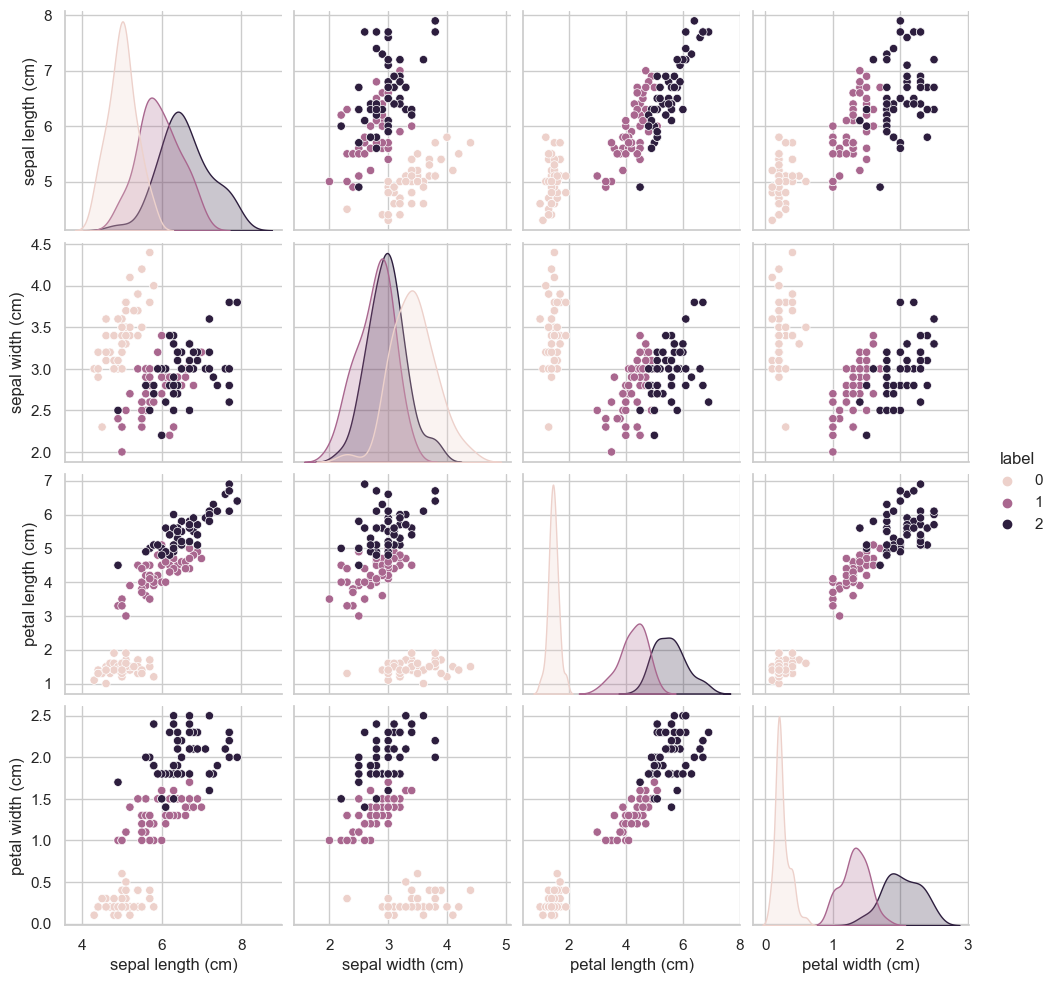

In [89]:
sns.pairplot(data,
             vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
            hue ='label')
plt.show()

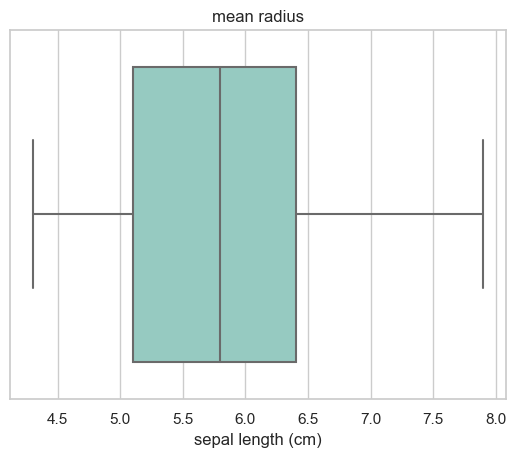

In [90]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="sepal length (cm)", data=data, palette="Set3")
plt.title("mean radius")
plt.show()

In [91]:
X=data.drop('label',axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [92]:
y=data['label']
y.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [93]:
X = X.to_numpy()

In [94]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
# number of samples / number of time steps chosen per sample , number of parallel time series or features

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [95]:
X.shape

(150, 4, 1)

In [96]:
from tensorflow.keras.utils import to_categorical
to_categorical(y)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [98]:
n_steps = X.shape[1]
n_steps

4

In [99]:
pip install keras

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [100]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [107]:
def build_model(): 
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(2))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model

model = build_model() 
print("input_shape => ", n_steps, n_features)
model.summary()

input_shape =>  4 1
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 3, 64)             192       
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 50)                3250      
                                                                 
 dense_17 (Dense)            (None, 50)                2550      
                                                                 
 dense_18 (Dense)            (None, 2)                 102       
                                  

In [108]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
4/4 [==============================] - 3s 214ms/step - loss: 16.0677 - accuracy: 0.3083 - val_loss: 12.8541 - val_accuracy: 0.4333
Epoch 2/100
4/4 [==============================] - 0s 35ms/step - loss: 16.0677 - accuracy: 0.3083 - val_loss: 12.8541 - val_accuracy: 0.4333
Epoch 3/100
4/4 [==============================] - 0s 45ms/step - loss: 16.0677 - accuracy: 0.3083 - val_loss: 12.8541 - val_accuracy: 0.4333
Epoch 4/100
4/4 [==============================] - 0s 31ms/step - loss: 16.0677 - accuracy: 0.3083 - val_loss: 12.8541 - val_accuracy: 0.4333
Epoch 5/100
4/4 [==============================] - 0s 36ms/step - loss: 16.0677 - accuracy: 0.3083 - val_loss: 12.8541 - val_accuracy: 0.4333
Epoch 6/100
4/4 [==============================] - 0s 35ms/step - loss: 16.0677 - accuracy: 0.3083 - val_loss: 12.8541 - val_accuracy: 0.4333
Epoch 7/100
4/4 [==============================] - 0s 35ms/step - loss: 16.0677 - accuracy: 0.3083 - val_loss: 12.8541 - val_accuracy: 0.4333
Epoch

1/1 [==============================] - 0s 182ms/step


ValueError: `axis` must be fewer than the number of dimensions (1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))